# TP1 OPTIMISATION 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from time import time
%matplotlib notebook
%matplotlib inline

In [2]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X, Y = np.meshgrid(x,y)

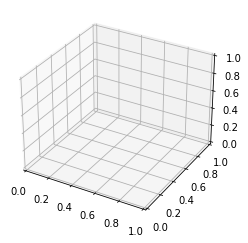

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

## (4) Représentation de la fonction J, n=2 : 

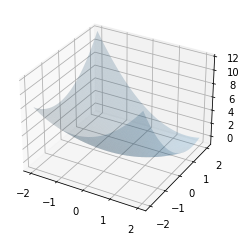

In [76]:
def J(x, y):
    return x*x+y*y-x*y-x-y

Z=J(X,Y)

ax.plot_surface(X, Y, Z, alpha=0.2)
fig

## Les courbes de niveaux de J :

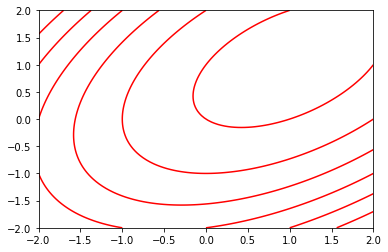

In [77]:
plt.contour(X, Y, Z, colors='red') 

## Verifier que A est définie positive numériquement 

In [78]:
n = 3

def generate(a, b, c):
    A = np.diag(a, -1)
    A += np.diag(b, 0)
    A += np.diag(c, 1)
    return A

b = np.array([2 for i in range(n)])
a = np.array([-1 for i in range(n-1)])
A = generate(a, b, a)
A

array([[ 2, -1,  0],
       [-1,  2, -1],
       [ 0, -1,  2]])

In [79]:
v = linalg.eigvals(A)
min(v)

0.5857864376269046

In [80]:
def isPositiveDefinite(A):
    return min(linalg.eigvals(A))>0

In [81]:
isPositiveDefinite(A)

True

### Les courbes de niveaux de J et les directions du vecteur gradient en chaque point :

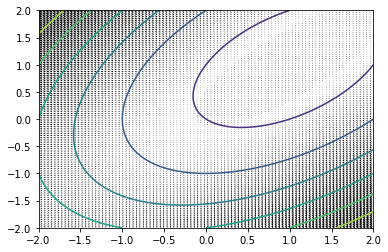

In [82]:
A=np.array([[2,-1],[-1,2]])
b=np.array([1,1])

plt.contour(X, Y, J(X,Y))
plt.quiver(X,Y,2*X-Y-1,2*Y-X-1)
plt.show()

## Méthode du gradient à pas fixe

### Implémentation et visualisation pour n=2

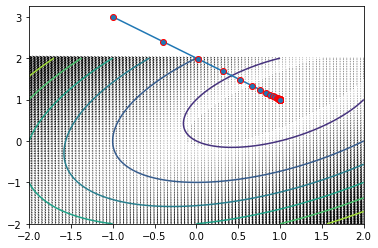

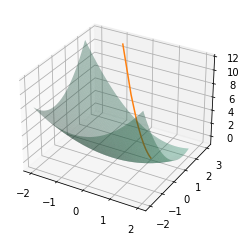

In [83]:
def J(x, y):
    return x*x+y*y-x*y-x-y
def gradJ(u):
    return A.dot(u)-b

def gradPasFixe(u0, rho, r0):
    max_iter = 1000
    X = [u0[0]]
    Y = [u0[1]]
    for i in range(max_iter):
        d=-gradJ(u0)
        u1=u0+rho*d
        r=linalg.norm(u1-u0)
        u0 = u1
        X.append(u0[0])
        Y.append(u0[1])
        if(r<r0):
            break
    return u0, np.array(X), np.array(Y)

u, u1, u2 = gradPasFixe(np.array([-1, 3]), 0.1, 0.000001)
plt.plot(u1, u2, marker='o', markeredgecolor="red")
plt.contour(X, Y, J(X,Y))
plt.quiver(X,Y,2*X-Y-1,2*Y-X-1)
plt.show()

g = np.vectorize(J)
ax.plot3D(u1, u2, g(u1, u2))


Z=J(X,Y)

ax.plot_surface(X, Y, Z, alpha=0.2)
fig

### Gradient à pas fixe pour n quelconque

In [84]:
# Fonction pour calculer et afficher les résultats de la méthode dugradient à pas fixe pour une dimension donnée
def MethodeDuGradientAPasFixe(n):
    
    # Fonction qui génère la matrice A
    def generate(a, b, c):
        A = np.diag(a, -1)
        A += np.diag(b, 0)
        A += np.diag(c, 1)
        return A

    # La fonction J
    def J(u):
        return 0.5*A.dot(u).dot(u)-b.dot(u)

    # Le grad de la fonction J
    def gradJ(u):
        return  A.dot(u)-b

    # Algorithme du gradient à pas fixe
    def gradPasFixe(u0 ,rho, r0):
        t0 = time()
        max_iter = 100000000
        for i in range(max_iter):
            d=-gradJ(u0)
            u1=u0+rho*d
            r=linalg.norm(u1-u0)
            u0 = u1
            if(r<r0):
                break
        t1 = time()
        return u0, i, t1-t0

    # donner la solution exacte, la methode du gradient et l'erreur à 5 chiffres après la virgule
    def resultat(A, b, u):

        x = linalg.solve(A, b)
        e = np.abs(u-x)

        print("{:<5} {:<18} {:<20} {:<22}".format("ui", "Solution exacte", "Methode du gradient", "Erreur"))
        for i in range(n):
            print("{:<5} {:<18,.5f} {:<20,.5f} {:<22,.5f}".format(i+1, x[i], u[i], e[i]))


    u0 = np.random.rand(n) # générer n valeurs aléatoires entre 0 et 1
    u0 = u0*10   # multiplier ces valeurs par dix pour avoir des valeurs alétoires entre 0 et 10


    b = np.array([2 for i in range(n)])
    a = np.array([-1 for i in range(n-1)])

    A = generate(a, b, a)
    b = np.array([1 for i in range(n)])

    u, i, t = gradPasFixe(u0, 0.1, 0.001)
    print("Solution de la méthode du gradient à pas fixe à 10⁻³ près avec n={} :".format(n))
    resultat(A, b, u)
    print()
    return t, i

temps = [0 for i in range(5)]
nb_iter = [0 for i in range(5)]
n_values = [10, 20, 30, 50, 100]
for i,n in enumerate(n_values):
    temps[i], nb_iter[i] = MethodeDuGradientAPasFixe(n)

print("Temps de calcul et nombres d'itérations pour chaque valeur de n :")
print("{:<5} {:<20} {:<20}".format("n", "nombre d'itérations", "temps(s)"))
for i in range(5):
    print("{:<5} {:<20} {:<20}".format(n_values[i], nb_iter[i], temps[i]))

Solution de la méthode du gradient à pas fixe à 10⁻³ près avec n=10 :
ui    Solution exacte    Methode du gradient  Erreur                
1     5.00000            4.98534              0.01466               
2     9.00000            8.97187              0.02813               
3     12.00000           11.96068             0.03932               
4     14.00000           13.95268             0.04732               
5     15.00000           14.94851             0.05149               
6     15.00000           14.94851             0.05149               
7     14.00000           13.95268             0.04732               
8     12.00000           11.96068             0.03932               
9     9.00000            8.97187              0.02813               
10    5.00000            4.98534              0.01466               

Solution de la méthode du gradient à pas fixe à 10⁻³ près avec n=20 :
ui    Solution exacte    Methode du gradient  Erreur                
1     10.00000           9.9794

### Remarque: 
#### On a interêt à ne pas choisir le pas fixe trop grand pour assurer la convergence et ne pas avoir des oscillations, et à ne pas le choisir trop petit pour minimiser le temps de calcul.

## Méthode du gradient à pas optimal

### Algorithme de la section dorée

In [85]:
# [a,b] est l'intervalle de définition
# u, d les vecteurs paramètres de la fonction f
# r0 la tolérance
# f la fonction dont on souhaite minimiser
def sectionDoree(a, b, u, d, r0, f):
    
    max_iter = 100000
    
    phi = (1+5**0.5)/2
    for i in range(max_iter):
        aprime = a + (b-a) / phi**2
        bprime = a + (b-a) / phi
        fa = f(a, u, d)
        fb = f(b, u, d)

        if fa > fb:
            a = aprime
        elif fa<fb:
            b = bprime
        else:
            a = aprime
            b = bprime
            
        err = b-a
        if(err<r0):
            break
    return a

### Implémentation et visualisation pour n=2

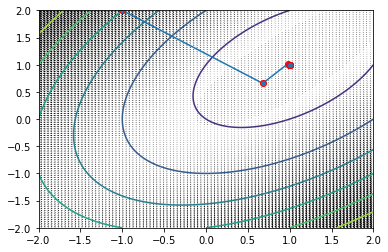

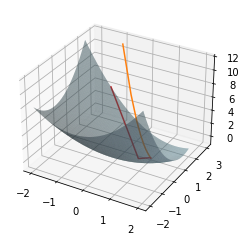

In [86]:
def J(x, y):
    return x*x + y*y - x*y - x - y

def gradJ(x, y):
    return np.array([2*x - y -1, 2*y - x - 1])

def f(x, u, d):
    return J(u[0] + x*d[0], u[1] + x*d[1])  

def gradPasOptimal(u0, r0):
    max_iter = 1000000
    
    X = [u0[0]]
    Y = [u0[1]]
    
    for i in range(max_iter):
        d = -gradJ(u0[0], u0[1])
        pas = sectionDoree(-10000, 10000, u0, d, 0.001, f)
        u1 = u0 + pas * d
        err = linalg.norm(u1-u0)
        u0 = u1
        
        X.append(u1[0])
        Y.append(u1[1])
        
        if err < r0 :
            break
    return u0, np.array(X), np.array(Y)

u, u1, u2 = gradPasOptimal(np.array([-1, 2]), 0.000001)
plt.plot(u1, u2, marker='o', markeredgecolor="red")
plt.contour(X, Y, J(X,Y))
plt.quiver(X,Y,2*X-Y-1,2*Y-X-1)
plt.show()

g = np.vectorize(J)
ax.plot3D(u1, u2, g(u1, u2))


Z=J(X,Y)

ax.plot_surface(X, Y, Z, alpha=0.2)
fig

### Gradient à pas optimal pour n quelconque

In [87]:
# Fonction pour calculer et afficher les résultats de la méthode dugradient à pas fixe pour une dimension donnée
def MethodeDuGradientAPasOptimal(n):
    
    # Fonction qui génère la matrice A
    def generate(a, b, c):
        A = np.diag(a, -1)
        A += np.diag(b, 0)
        A += np.diag(c, 1)
        return A

    # La fonction J
    def J(u):
        return 0.5*A.dot(u).dot(u)-b.dot(u)

    # Le grad de la fonction J
    def gradJ(u):
        return  A.dot(u)-b

    def f(x, u, d):
        return J(u + x*d)     

    def gradPasOptimal(u0, r0):
        max_iter = 100000000
        t0 = time()
        for i in range(max_iter):
            d = -gradJ(u0)
            pas = sectionDoree(-10000, 10000, u0, d, 0.001, f)
            u1 = u0 + pas * d
            err = linalg.norm(u1-u0)
            u0 = u1
            if err < r0 :
                break
        t1 = time()
        return u0, i, t1-t0

    # donner la solution exacte, la methode du gradient et l'erreur à 5 chiffres après la virgule
    def resultat(A, b, u):

        x = linalg.solve(A, b)
        e = np.abs(u-x)

        print("{:<5} {:<18} {:<20} {:<22}".format("ui", "Solution exacte", "Methode du gradient", "Erreur"))
        for i in range(n):
            print("{:<5} {:<18,.5f} {:<20,.5f} {:<22,.5f}".format(i+1, x[i], u[i], e[i]))


    u0 = np.random.rand(n) # générer n valeurs aléatoires entre 0 et 1
    u0 = u0*10   # multiplier ces valeurs par dix pour avoir des valeurs alétoires entre 0 et 10


    b = np.array([2 for i in range(n)])
    a = np.array([-1 for i in range(n-1)])

    A = generate(a, b, a)
    b = np.array([1 for i in range(n)])

    u, i, t = gradPasOptimal(u0, 0.000001)
    print("Solution de la méthode du gradient à pas fixe à 10⁻³ près avec n={} :".format(n))
    resultat(A, b, u)    
    print()
    return t, i

temps = [0 for i in range(5)]
nb_iter = [0 for i in range(5)]
n_values = [10, 20, 30, 50, 100]
for i,n in enumerate(n_values):
    temps[i], nb_iter[i] = MethodeDuGradientAPasOptimal(n)

print("Temps de calcul et nombres d'itérations pour chaque valeur de n :")
print("{:<5} {:<20} {:<20}".format("n", "nombre d'itérations", "temps(s)"))
for i in range(5):
    print("{:<5} {:<20} {:<20}".format(n_values[i], nb_iter[i], temps[i]))



Solution de la méthode du gradient à pas fixe à 10⁻³ près avec n=10 :
ui    Solution exacte    Methode du gradient  Erreur                
1     5.00000            5.00000              0.00000               
2     9.00000            9.00000              0.00000               
3     12.00000           11.99999             0.00001               
4     14.00000           13.99999             0.00001               
5     15.00000           14.99999             0.00001               
6     15.00000           14.99999             0.00001               
7     14.00000           13.99999             0.00001               
8     12.00000           11.99999             0.00001               
9     9.00000            9.00000              0.00000               
10    5.00000            5.00000              0.00000               

Solution de la méthode du gradient à pas fixe à 10⁻³ près avec n=20 :
ui    Solution exacte    Methode du gradient  Erreur                
1     10.00000           10.000

### Remarque:
#### On remarque que pour n=100 l'algorithme du gradient à pas optimal a mis un peu de temps, c'est dû à l'imbriquation de la fonction qui calcul le pas optimal dans l'algorithm.
#### La complexité temporelle sera alors O( M * K ) où M est le nombre d'itération de l'algorithme du gradient  et K le nombre d'itération de l'algorithme de la section dorée 

## Méthode du gradient conjugué

### Implémentation et visualisation pour n=2

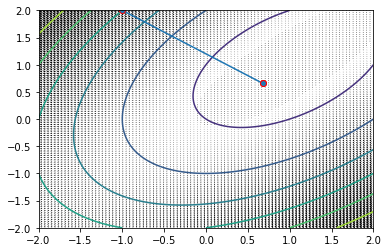

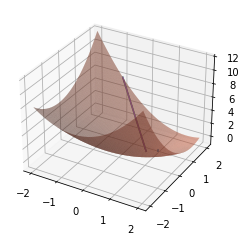

In [6]:
A=np.array([[2,-1],[-1,2]])
b=np.array([1,1])

def J(x, y):
    return x*x + y*y - x*y - x - y

def gradJ(x, y):
    return np.array([2*x - y -1, 2*y - x - 1])

def f(x, u, d):
    return J(u[0] + x*d[0], u[1] + x*d[1])  

def gradConjugué(u0, r0):
    max_iter = 10000000
    
    X = [u0[0]]
    Y = [u0[1]]
    
    r1 = A.dot(u0)-b
    d1 = -r1
    
    for i in range(max_iter):
 
        pas = -r1.dot(d1)/A.dot(d1).dot(d1)
       
        u1 = u0 + pas * d1
        
        r2 = A.dot(u1)-b
        try:
            beta = linalg.norm(r2)**2/linalg.norm(r1)**2
        except:
            print("division by zero !!!")
        d1 = -r1+beta*d1
        
        
        err = linalg.norm(u1-u0)
        u0 = u1
        
        X.append(u1[0])
        Y.append(u1[1])
        
        r1 = r2
        if err < r0 :
            break
    return u0, np.array(X), np.array(Y)

u, u1, u2 = gradConjugué(np.array([-1, 2]), 0.000001)
plt.plot(u1, u2, marker='o', markeredgecolor="red")
plt.contour(X, Y, J(X,Y))
plt.quiver(X,Y,2*X-Y-1,2*Y-X-1)
plt.show()

g = np.vectorize(J)
ax.plot3D(u1, u2, g(u1, u2))


Z=J(X,Y)

ax.plot_surface(X, Y, Z, alpha=0.2)
fig

### Gradient Conjugué pour n quelconque

In [7]:
# Fonction pour calculer et afficher les résultats de la méthode dugradient à pas fixe pour une dimension donnée
def MethodeDuGradientConjugue(n):
    
    # Fonction qui génère la matrice A
    def generate(a, b, c):
        A = np.diag(a, -1)
        A += np.diag(b, 0)
        A += np.diag(c, 1)
        return A

    # La fonction J
    def J(u):
        return 0.5*A.dot(u).dot(u)-b.dot(u)

    # Le grad de la fonction J
    def gradJ(u):
        return  A.dot(u)-b

    def gradConjugue(u0, r0):
        max_iter = 1000

        t0 = time()
        r1 = A.dot(u0)-b
        d1 = -r1

        for i in range(max_iter):

            pas = -r1.dot(d1)/A.dot(d1).dot(d1)

            u1 = u0 + pas * d1

            r2 = A.dot(u1)-b
            beta = linalg.norm(r2)**2/linalg.norm(r1)**2

            d1 = -r1+beta*d1


            err = linalg.norm(u1-u0)
            u0 = u1
            r2 = r1
            
            if err < r0 :
                break
                
        t1 = time()
        return u0, i, t1-t0
    
    
    # donner la solution exacte, la methode du gradient et l'erreur à 5 chiffres après la virgule
    def resultat(A, b, u):

        x = linalg.solve(A, b)
        e = np.abs(u-x)

        print("{:<5} {:<18} {:<20} {:<22}".format("ui", "Solution exacte", "Methode du gradient", "Erreur"))
        for i in range(n):
            print("{:<5} {:<18,.5f} {:<20,.5f} {:<22,.5f}".format(i+1, x[i], u[i], e[i]))


    u0 = np.random.rand(n) # générer n valeurs aléatoires entre 0 et 1
    u0 = u0*10   # multiplier ces valeurs par dix pour avoir des valeurs alétoires entre 0 et 10


    b = np.array([2 for i in range(n)])
    a = np.array([-1 for i in range(n-1)])

    A = generate(a, b, a)
    b = np.array([1 for i in range(n)])

    u, i, t = gradConjugue(u0, 0.000001)
    print("Solution de la méthode du gradient à pas fixe à 10⁻³ près avec n={} :".format(n))
    resultat(A, b, u)    
    print()
    return t, i

temps = [0 for i in range(5)]
nb_iter = [0 for i in range(5)]
n_values = [10, 20, 30, 50, 100]
for i,n in enumerate(n_values):
    temps[i], nb_iter[i] = MethodeDuGradientConjugue(n)

print("Temps de calcul et nombres d'itérations pour chaque valeur de n :")
print("{:<5} {:<20} {:<20}".format("n", "nombre d'itérations", "temps(s)"))
for i in range(5):
    print("{:<5} {:<20} {:<20}".format(n_values[i], nb_iter[i], temps[i]))



Solution de la méthode du gradient à pas fixe à 10⁻³ près avec n=10 :
ui    Solution exacte    Methode du gradient  Erreur                
1     5.00000            -255.76910           260.76910             
2     9.00000            270.02324            261.02324             
3     12.00000           -108.66013           120.66013             
4     14.00000           94.39278             80.39278              
5     15.00000           -21.56512            36.56512              
6     15.00000           -70.60062            85.60062              
7     14.00000           207.98339            193.98339             
8     12.00000           -59.51471            71.51471              
9     9.00000            26.61881             17.61881              
10    5.00000            -149.50527           154.50527             

Solution de la méthode du gradient à pas fixe à 10⁻³ près avec n=20 :
ui    Solution exacte    Methode du gradient  Erreur                
1     10.00000           nan   